In [1]:
#Import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

In [2]:
#Load data and read in csv file
file_path = Path("Resources/myopia.csv")
myopia_df = pd.read_csv(file_path)
myopia_df

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,6,0.678,22.400000,3.663,3.803,14.93,2,0,7,3,14,37,1,0,1
614,6,0.665,22.500000,3.570,3.378,15.56,6,0,1,0,8,10,1,1,0
615,6,1.834,22.940001,3.624,3.424,15.89,8,0,0,0,4,4,1,1,0
616,6,0.665,21.920000,3.688,3.598,14.64,12,2,1,0,15,23,0,0,0


In [3]:
#Create labels for t-SNE used later on
labels = myopia_df['MYOPIC']
labels.value_counts()

0    537
1     81
Name: MYOPIC, dtype: int64

In [4]:
#Remove the "MYOPIC" column from the dataset.
myopia_df= myopia_df.drop('MYOPIC', axis=1)
myopia_df

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,6,0.678,22.400000,3.663,3.803,14.93,2,0,7,3,14,37,1,0
614,6,0.665,22.500000,3.570,3.378,15.56,6,0,1,0,8,10,1,1
615,6,1.834,22.940001,3.624,3.424,15.89,8,0,0,0,4,4,1,1
616,6,0.665,21.920000,3.688,3.598,14.64,12,2,1,0,15,23,0,0


# Data Pre-Processing

In [5]:
#Check to ensure all features and numeric; if so then able to scale
myopia_df.dtypes

AGE            int64
SPHEQ        float64
AL           float64
ACD          float64
LT           float64
VCD          float64
SPORTHR        int64
READHR         int64
COMPHR         int64
STUDYHR        int64
TVHR           int64
DIOPTERHR      int64
MOMMY          int64
DADMY          int64
dtype: object

In [6]:
# Check to ensure there are no duplicate values
myopia_df.duplicated().sum()

0

In [7]:
#Standardize dataset using StandaradScaler; initiliaze StandardScaler
model = StandardScaler()
myopia_scaled= model.fit_transform(myopia_df)
myopia_scaled

array([[-4.20219106e-01, -1.36391690e+00, -8.92861464e-01, ...,
         4.98303926e-01,  9.87137728e-01,  1.00324150e+00],
       [-4.20219106e-01, -3.08612235e-01, -1.71839800e-01, ...,
        -8.75087555e-01,  9.87137728e-01,  1.00324150e+00],
       [-4.20219106e-01,  6.04386289e-01, -9.97682023e-03, ...,
        -7.50233784e-01, -1.01302987e+00, -9.96768974e-01],
       ...,
       [-4.20219106e-01,  1.65169621e+00,  6.52187361e-01, ...,
        -1.37450264e+00,  9.87137728e-01,  1.00324150e+00],
       [-4.20219106e-01, -2.17472219e-01, -8.48716244e-01, ...,
        -1.88391815e-01, -1.01302987e+00, -9.96768974e-01],
       [-4.20219106e-01,  1.58339808e-03, -3.48415042e-01, ...,
        -7.50233784e-01,  9.87137728e-01,  1.00324150e+00]])

# Dimensionality Reduction

In [8]:
# Perform dimensionality reduction with PCA; initialize PCA model

pca = PCA(n_components=.90)

In [9]:
#Principal components for myopia data; perform fit on scaled dataset
myopia_pca= pca.fit_transform(myopia_scaled)

In [10]:
# Fetch the explained variance
pca.explained_variance_ratio_

array([0.21177355, 0.15659716, 0.08688023, 0.08301762, 0.07584858,
       0.06997878, 0.06486986, 0.06377808, 0.05393666, 0.05205566])

In [11]:
# Create t-SNE how many clusters should there be; initiliaze t-SNE model
tsne = TSNE(learning_rate = 100)

In [12]:
#Reduce dimensions
tsne_features = tsne.fit_transform(myopia_pca)

C:\Users\Turhonda\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


In [13]:
#Check shape
tsne_features.shape

(618, 2)

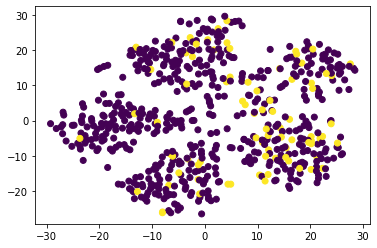

In [14]:
#Create scatter plot of t-SNE output
plt.scatter(tsne_features[:,0],tsne_features[:,1],c=labels)

#  Perform a Cluster Analysis with K-means

In [15]:
#Create an inertia list
inertia = []

#Create k list list(range(1,11))
k = [1,2,3,4,5,6,7,8,9,10]

#Looking for the best k:
for i in k:
    model = KMeans(n_clusters = i, random_state = 42)
    model.fit(myopia_pca)
    inertia.append(model.inertia_)


C:\Users\Turhonda\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [16]:
#Create DataFrame to plot Elbow Curve
elbow_df = {'k' : k, 'Inertia': inertia}
elbow_df = pd.DataFrame(elbow_df)

elbow_df.head()

,k,Inertia
0,1,7948.905345
1,2,6794.293482
2,3,6030.953812
3,4,5662.799045
4,5,5381.970825


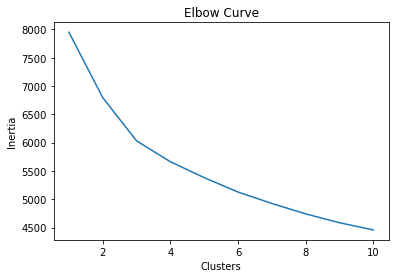

In [17]:
#Plot Elbow Curve
plt.plot(elbow_df['k'], elbow_df['Inertia'])
plt.xlabel('Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.show()


 From the elbow curve, it appears that the best value for k is 3. Where k=3 looks as if it is the inflection point where the curve starts to taper off. 

In [18]:
# Find the number of principal components by using the built in components feature
len(pca.components_)

10

In [19]:
#Create a DataFrame from the pca data for K-Means
myopia_pca_df = pd.DataFrame(data= myopia_pca, columns = ['PC 1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10'])
# Add class column to DataFrame
myopia_pca_df['Class']= model.labels_
myopia_pca_df.head()

,PC 1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,Class
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144,1
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031,3
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336,7
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400,1
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183,7


In [20]:
# Use the k-Means model with k =3 as determined by the elbow curve as the optimal number of clusters
km= KMeans(n_clusters= 3, random_state = 42)

In [21]:
#Fit k-Means model
km.fit(myopia_pca_df)

KMeans(n_clusters=3, random_state=42)

In [22]:
#Make prediction for clusters
predictions = km.predict(myopia_pca_df)

In [23]:
myopia_pca_df['class']= km.labels_

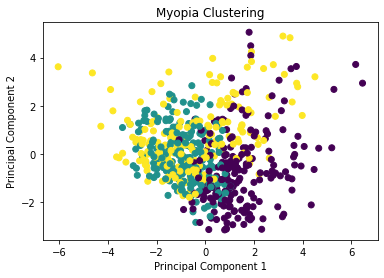

In [28]:
#Plot clusters using scatter plot
plt.scatter(x=myopia_pca_df['PC 1'], y= myopia_pca_df['PC2'], c= myopia_pca_df['class'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Myopia Clustering')
plt.show()

# Recommendations
## Clustering Findings

From the findings, it appears as though the optimal number of clusters for this dataset is when k=3. A recommendation for further analysis would be to get a larger dataset and tune the parameters with a lower learning rate.